### Import libraries

In [7]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import plotly.express as px

### Customize

In [8]:
# Customize parameters
my_input_file='0408 my_input.csv'
my_predicted_values="0408 predicted_kpi_data.csv"
my_features = ['Employee_Training_Hours', 'Customer_Satisfaction', 'Process_Efficiency',
            'Issue_Resolution_Time', 'Innovation_Score']
my_target= 'Profit_Margin'
my_feature_plot = '0408 feature_plot.png'
my_decision_plot = '0408 decision_tree_visual.png'

### Read data and fit model 

In [9]:
# Read data
data = pd.read_csv(my_input_file)

# Define Features (Non-Financial) and Target (Financial)
X = data[my_features]
y = data[my_target]

# Train Decision Tree Regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = DecisionTreeRegressor(max_depth=3, random_state=0)
model.fit(X_train, y_train)

# Evaluate Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

Mean Squared Error on Test Set: 4.40


### Feature importance

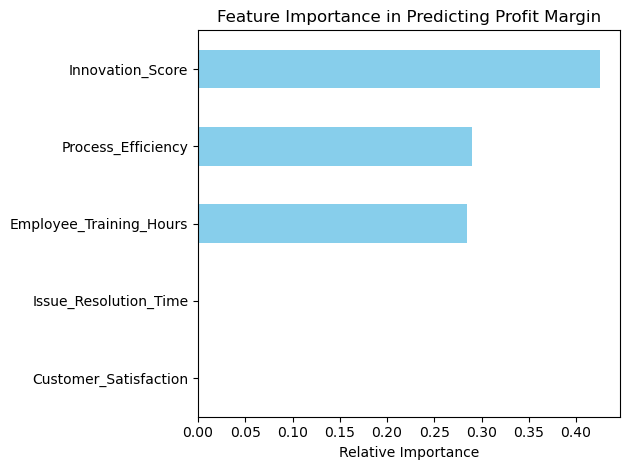

In [10]:
# Visualize Feature Importance 
importances = pd.Series(model.feature_importances_, index=my_features).sort_values(ascending=True)
importances.plot(kind='barh', title="Feature Importance in Predicting Profit Margin", color='skyblue')
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.savefig(my_feature_plot)
plt.show()

### Visual decision tree

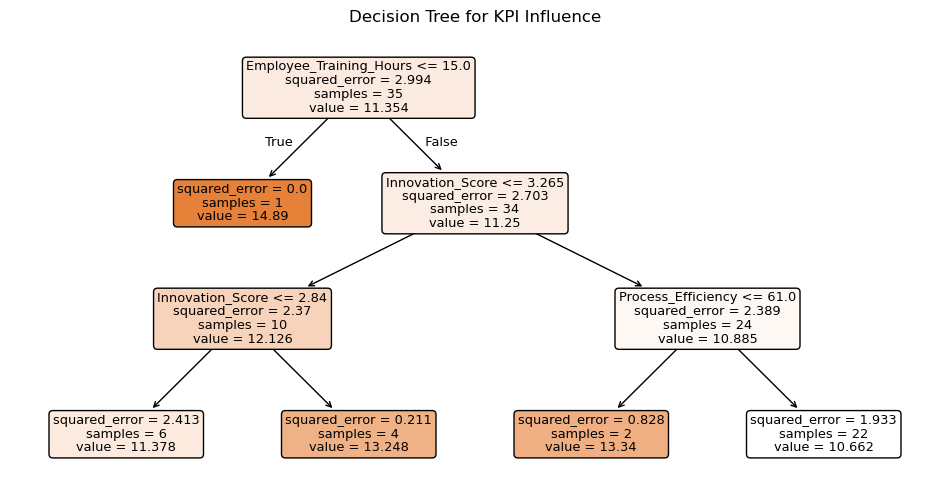

In [11]:
# Plot Decision Tree
plt.figure(figsize=(12,6))
plot_tree(model, feature_names=my_features, filled=True, rounded=True)
plt.title("Decision Tree for KPI Influence")
plt.savefig(my_decision_plot)
plt.show()

### Display predicted data

In [12]:
# Show Data with Predictions
data['Predicted_Profit_Margin'] = model.predict(X)

# Save the updated DataFrame to a CSV file
data.to_csv(my_predicted_values, index=False)

print("\n Sample of KPI Data with Predicted Profit Margin:")
print(data.head())



 Sample of KPI Data with Predicted Profit Margin:
   Employee_Training_Hours  Customer_Satisfaction  Process_Efficiency  \
0                       32                   4.21                  79   
1                       38                   3.46                  83   
2                       32                   4.07                  87   
3                       44                   4.81                  85   
4                       49                   4.42                  63   

   Issue_Resolution_Time  Innovation_Score  Profit_Margin  \
0                      5              4.00          10.66   
1                      6              2.85          13.76   
2                      4              4.33          10.72   
3                      9              3.84           8.46   
4                      5              4.19          10.48   

   Predicted_Profit_Margin  
0                10.661818  
1                13.247500  
2                10.661818  
3                10.661818 